# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [0]:
import numpy as np

### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y = np.sin(x)
    return y

In [0]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x = np.random.random((N,))*2*np.pi
    yd = fx(x)
    return x, yd

In [0]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

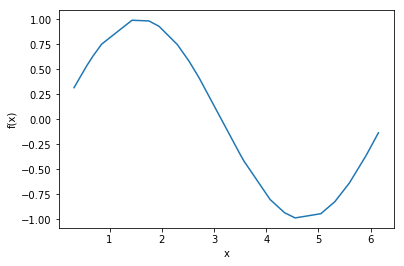

In [0]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [0]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    # YOUR CODE HERE
    A = []
    l = []
    print(np.amax(x))
#     x_n = (x - np.mean(x))/np.std(x) ##This normalizatoin does not work, because some values may be outside 0 to 1 and they explode when using higher degree models
    x_n = x/(np.pi*2)
    for i in x_n:
       for j in range(D+1):
          temp = i**j
          l.append(temp)
       A.append(l)
       l = []
    A = np.array(A)
    return A

In [0]:
# def createA(x, D):
#     '''
#     Create the matrix A with degree D
#     Input:
#         x: np vector of shape (N,)
#         D: degree of the model
#     Output:
#         A: np matrix of shape (N,D+1)
#     '''
#     # YOUR CODE HERE
#     A = np.ones((x.shape[0], D+1))
#     for i in range(D+1):
#       A[:, i] = x**i
#     return A

In [0]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

3


AssertionError: ignored

### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [0]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    # YOUR CODE HERE
    ## ((A_T.A)^(-1))A_Ty
#     w = np.linalg.inv((A.T.dot(A))).dot(A.T.dot(yd)) ## pseudo - inverse solution
    
    0
  
  
    ## Gradient descent solution
    ## Remember to normalize inputs because they are in range (0, 2*pi) -> (0, 6.8). These values explode for higher degree models
    
    w = np.zeros((A.shape[1], 1))
    eta = 0.1
    D = A.shape[1] - 1
    ## Weight update for each point separately
    epochs = 10000
    print(w.shape)
    for i in range(epochs):
      for j in range(A.shape[0]):
        y_j = A[j].reshape(1, D+1).dot(w)
        e = yd[j] - y_j
        w = w + eta*A[j].reshape(1, D+1).T*e
#         print('e: ', e, 'A[j]:', A[j])
#         print(w)
    return w

In [0]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    A = createA(x, w.shape[0]-1)
    y = A.dot(w)
    return y

In [0]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

### Estimate Error
Find E as the mean squared error

In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    mse = np.sum((y-yd)**2)/y.shape[0]
    print(mse.shape)
    return mse

In [0]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

()
Test passed 👍


### Plotting


In [0]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x, yd = generateX_fx(N)
    A = createA(x, D)
    w = train_w(A, yd)
    y = predict_y(w, x)
    mse = compute_mse(y, yd)
    return x, y, yd, w, mse

In [0]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print('MSE on train data = ', mse)
#     plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

5.584733976726908
(3, 1)
5.584733976726908
()
MSE on train data =  19.074601978858453
Test passed 👍


## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
   
    x, yd = generateX_fx(Ntest)
    y =  predict_y(w, x)
    mse = compute_mse(y, yd)

    
    
    return x, y, yd, mse

6.255465171726587
(11, 1)
6.255465171726587
()
MSE on train data =  32.43329755063971
6.2489328973328355
()
MSE on test data =  44.427036745390225
Test passed 👍


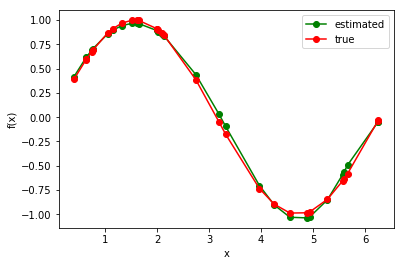

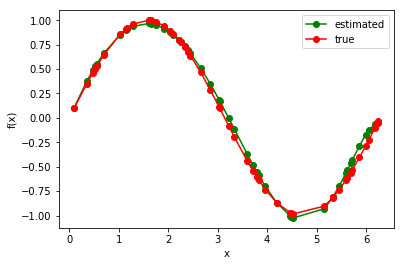

In [0]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

2.039495642993068
(6, 1)
2.039495642993068
()
0.006518536407237993
3.3295214111354623
()
4.628547363724852
(6, 1)
4.628547363724852
()
nan
3.8750407594747016
()
5.935125383049476
(6, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in add


5.935125383049476
()
nan
5.896962027721839
()
4.82739017255763
(6, 1)
4.82739017255763
()
nan
5.8134816530941515
()
5.973081710118862
(6, 1)
5.973081710118862
()
nan
6.13900734550341
()
5.194783855185344
(6, 1)
5.194783855185344
()
nan
4.959874533014889
()
5.357860629151528
(6, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in multiply


5.357860629151528
()
nan
6.175245817792631
()
5.617784345377351
(6, 1)
5.617784345377351
()
nan
5.961197054765407
()
5.460566722498158
(6, 1)
5.460566722498158
()
nan
6.106530303560386
()
6.264049831153995
(6, 1)
6.264049831153995
()
nan
6.03017737526344
()
t [0.006518536407237993, nan, nan, nan, nan, nan, nan, nan, nan, nan]


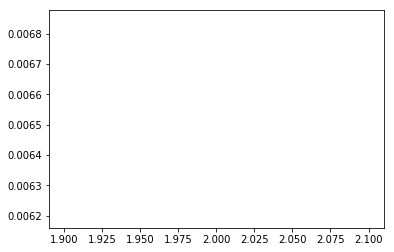

In [0]:
Ns = [2, 3, 4,  5, 6, 7, 8, 9, 10, 30]
D = 5
train_error = []
test_error = []
for N in Ns:
  x, y, yd, w, mse_train = trainModel(N, D)
  print(mse_train)
  train_error.append(mse_train)
  x, y, yd, mse_test = testModel(N, w)
  test_error.append(mse_test)
  
print('t',train_error)
import matplotlib.pyplot as plt
plt.plot(Ns, train_error)

In [0]:
plt.plot(Ns, test_error)
print(mse_test)

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2,+ 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

In [0]:
Ds = [0, 1, 2, 4, 7, 12]
N = 10
train_error = []
test_error = []
for D in Ds:
  x, y, yd, w, mse_train = trainModel(N, D)
  train_error.append(mse_train)
  x, y, yd, mse_test = testModel(N, w)
  test_error.append(mse_test)
  
import matplotlib.pyplot as plt
plt.plot(Ds, train_error)

In [0]:
plt.plot(Ds, test_error)
